### 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기



In [13]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

1.0.2


**붓꽃 예측을 위한 사이킷런 필요 모듈 로딩**

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

**데이터 세트를 로딩**

In [15]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


**학습 데이터와 테스트 데이터 세트로 분리**

In [16]:
# 학습 Feature 데이터, 테스트 Feature 데이터, 학습 Test 데이터, 테스트 Test 데이터
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)
# random_state 반복 수행 시, 고정 값으로 고정해주는 역할 => 어떤 값이든 상관없다.

**학습 데이터 세트로 학습(Train)수행**

In [17]:
# DecisionTreeClassifier 객체 생성 (결정 트리 분류)
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

**테스트 데이터 세트로 예측(Predict) 수행**

In [18]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(X_test)

In [19]:
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

**예측 정확도 평가**

In [24]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


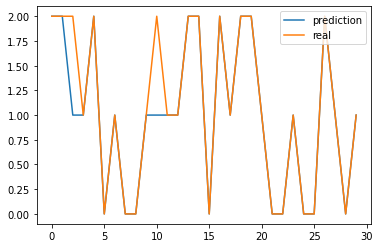

In [22]:
import matplotlib.pyplot as plt
plt.plot(pred, label='prediction')
plt.plot(y_test, label='real')
plt.legend()
plt.show()

### 모델 성능 평가 지표
![](./01.png)